# 一、数据

## 经典数据集

### 1 入门数据集：MNIST一族以及其他字母/数字数据集

In [1]:
#在频繁调用数据的过程中，可能出现环境问题，导致jupyter整个崩溃刷新
#为解决/避免该问题，对环境进行了部分修改
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
fmnist = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                          ,train = True #根据类的不同，参数可能发生变化
                                          ,download = False #未下载则设置为True
                                          ,transform = transforms.ToTensor())

In [4]:
svhn = torchvision.datasets.SVHN(root ='F:\datasets\SVHN'
                                 ,split ="train" #"test","val"
                                 ,download = False
                                 ,transform = transforms.ToTensor())

In [5]:
omnist = torchvision.datasets.Omniglot(root ='F:\datasets'
                                       ,background = True
                                       ,download = False
                                       ,transform = transforms.ToTensor())

In [6]:
#如返回结果所示，除了样本量之外什么都无法看见
omnist

Dataset Omniglot
    Number of datapoints: 19280
    Root location: F:\datasets\omniglot-py
    StandardTransform
Transform: ToTensor()

In [7]:
fmnist

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: F:\datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
svhn

Dataset SVHN
    Number of datapoints: 73257
    Root location: F:\datasets\SVHN
    Split: train
    StandardTransform
Transform: ToTensor()

In [9]:
fmnist.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
#之前我们使用.data的方式查看特征，.target的方式查看标签，但如下所示，不同的数据集并不共享调用的API
#这其实可以理解，当面临的任务不同时，每个数据集的标签排布方式和意义也都不同，因此不太可能使用相同的API进行调用
for i in [fmnist,svhn,omnist]:
    print(i.data.shape)

torch.Size([60000, 28, 28])
(73257, 3, 32, 32)


AttributeError: 'Omniglot' object has no attribute 'data'

In [11]:
for i in [fmnist,svhn,omnist]:
    print(i.targets.shape)

torch.Size([60000])


AttributeError: 'SVHN' object has no attribute 'targets'

In [12]:
#如果你想查看每个数据集都可以调用哪些属性，必须要进入到数据集的源码进行查看
#如果不想读源码，也可以直接使用下面的方式进行简单的调用
#索引的方式调用单个样本
omnist[0][0].shape

torch.Size([1, 105, 105])

In [13]:
len(omnist) #查看样本量

19280

In [14]:
omnist.__len__()

19280

In [15]:
#报错概率最低的查看方式
for i in [fmnist,svhn,omnist]:
    for x,y in i:
        print(x.shape,y)
        break

torch.Size([1, 28, 28]) 9
torch.Size([3, 32, 32]) 1
torch.Size([1, 105, 105]) 0


In [16]:
#可视化
#实际上，在读图时如果不加ToTensor的预处理，很可能直接读出PIL文件
#PIL可以直接可视化
fmnist = torchvision.datasets.FashionMNIST(root ='F:\datasets'
                                          ,train =True #根据类的不同，参数可能发生变化
                                          ,download =False #未下载则设置为True
                                         ,transform = transforms.ToTensor()
                                          )

In [17]:
fmnist[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [18]:
fmnist[0][0] #尺寸较小，难以看清

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [19]:
#同时，当数据集很大时，我们希望最好只读取一遍，所以一般还是会加上ToTensor
#此时我们就需要自己编写可视化的函数

#使用numpy和matplotlib将图像可视化
import matplotlib.pyplot as plt
import numpy as np
import random

#让每个数据集随机显示5张图像
def plotsample(data):
    fig, axs = plt.subplots(1,5,figsize=(10,10)) #建立子图
    for i in range(5):
        num = random.randint(0,len(data)-1) #首先选取随机数，随机选取五次
        #抽取数据中对应的图像对象，make_grid函数可将任意格式的图像的通道数升为3，而不改变图像原始的数据
        #而展示图像用的imshow函数最常见的输入格式也是3通道
        npimg = torchvision.utils.make_grid(data[num][0]).numpy()
        nplabel = data[num][1] #提取标签
        #将图像由(3, weight, height)转化为(weight, height, 3)，并放入imshow函数中读取
        axs[i].imshow(np.transpose(npimg, (1, 2, 0))) 
        axs[i].set_title(nplabel) #给每个子图加上标签
        axs[i].axis("off") #消除每个子图的坐标轴

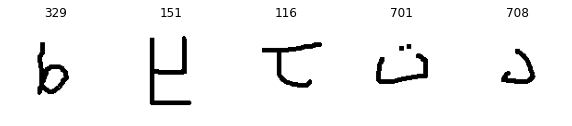

In [20]:
#可以自行修改plotsample函数，为可视化实现更高的自由度
plotsample(omnist)

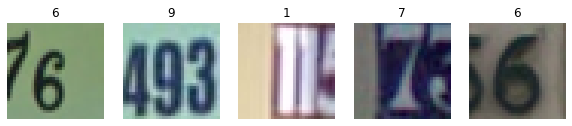

In [21]:
plotsample(svhn)

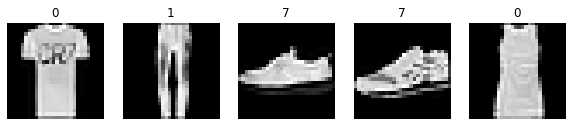

In [22]:
plotsample(fmnist)

### 2 竞赛数据集

In [23]:
#导入一个类别
data_train = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                       ,classes=["church_outdoor_train"] #标签类别
                                       ,transform = transforms.ToTensor()
                                      )

In [24]:
data_train

Dataset LSUN
    Number of datapoints: 126227
    Root location: F:\datasets2\lsun-master\data
    Classes: ['church_outdoor_train']
    StandardTransform
Transform: ToTensor()

In [25]:
data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val"]
                                     ,transform = transforms.ToTensor())

In [26]:
data_val

Dataset LSUN
    Number of datapoints: 300
    Root location: F:\datasets2\lsun-master\data
    Classes: ['church_outdoor_val']
    StandardTransform
Transform: ToTensor()

In [27]:
data_train[3][0]

tensor([[[0.8471, 0.8471, 0.8471,  ..., 0.9373, 0.9098, 0.5961],
         [0.8471, 0.8471, 0.8471,  ..., 0.9412, 0.9176, 0.6471],
         [0.8471, 0.8471, 0.8471,  ..., 0.9412, 0.9294, 0.7333],
         ...,
         [0.4902, 0.4902, 0.4902,  ..., 0.2902, 0.2863, 0.2824],
         [0.4980, 0.4980, 0.4980,  ..., 0.3098, 0.3059, 0.3020],
         [0.4941, 0.4941, 0.4941,  ..., 0.3333, 0.3333, 0.3333]],

        [[0.8510, 0.8510, 0.8510,  ..., 0.9294, 0.9020, 0.5882],
         [0.8510, 0.8510, 0.8510,  ..., 0.9333, 0.9098, 0.6392],
         [0.8510, 0.8510, 0.8510,  ..., 0.9333, 0.9216, 0.7255],
         ...,
         [0.4824, 0.4824, 0.4824,  ..., 0.1529, 0.1490, 0.1451],
         [0.4902, 0.4902, 0.4902,  ..., 0.1725, 0.1686, 0.1647],
         [0.4863, 0.4863, 0.4863,  ..., 0.1961, 0.1961, 0.1961]],

        [[0.8588, 0.8588, 0.8588,  ..., 0.9725, 0.9451, 0.6314],
         [0.8588, 0.8588, 0.8588,  ..., 0.9765, 0.9529, 0.6824],
         [0.8588, 0.8588, 0.8588,  ..., 0.9765, 0.9647, 0.

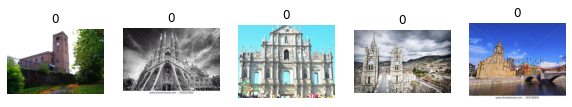

In [28]:
plotsample(data_val)

In [29]:
for x, y in data_val:
    print(x.shape)
    print(y)

torch.Size([3, 256, 341])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 358, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 383, 256])
0
torch.Size([3, 256, 360])
0
torch.Size([3, 256, 358])
0
torch.Size([3, 377, 256])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 360])
0
torch.Size([3, 256, 292])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 363])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 349, 256])
0
torch.Size([3, 256, 384])
0
torch.Size([3, 386, 256])
0
torch.Size([3, 271, 256])
0
torch.Size([3, 256, 340])
0
torch.Size([3, 256, 256])
0
torch.Size([3, 256, 380])
0
torch.Size([3, 256, 387])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 256, 383])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 386, 256])
0
torch.Size([3, 256, 446])
0
torch.Size([3, 256, 361])
0
torch.Size([3, 341, 256])
0
torch.Size([3, 256, 341])
0
torch.Size([3, 376, 256])
0
torch.Size([3, 256, 

In [30]:
#只导入一个类别时，该类别是没有标签的
check_ = 0
for x,y in data_val:
    check_+=y

In [31]:
check_

0

In [32]:
#想要进行训练，至少得导入两个类别，进行二分类
data_train = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                       ,classes=["church_outdoor_train","classroom_train"]
                                       ,transform = transforms.ToTensor())

In [33]:
data_train

Dataset LSUN
    Number of datapoints: 294330
    Root location: F:\datasets2\lsun-master\data
    Classes: ['church_outdoor_train', 'classroom_train']
    StandardTransform
Transform: ToTensor()

In [34]:
data_val = torchvision.datasets.LSUN(root=r"F:\datasets2\lsun-master\data"
                                     ,classes=["church_outdoor_val","classroom_val"]
                                     ,transform = transforms.ToTensor())

In [35]:
data_val

Dataset LSUN
    Number of datapoints: 600
    Root location: F:\datasets2\lsun-master\data
    Classes: ['church_outdoor_val', 'classroom_val']
    StandardTransform
Transform: ToTensor()

In [36]:
data_val[298]

(tensor([[[0.1804, 0.1843, 0.1804,  ..., 0.4902, 0.4863, 0.4863],
          [0.1922, 0.1961, 0.1961,  ..., 0.4902, 0.4902, 0.4863],
          [0.1608, 0.1686, 0.1765,  ..., 0.4941, 0.4902, 0.4902],
          ...,
          [0.1137, 0.1686, 0.1882,  ..., 0.1804, 0.1765, 0.1804],
          [0.1294, 0.1804, 0.1922,  ..., 0.1686, 0.1725, 0.1765],
          [0.1255, 0.1725, 0.1765,  ..., 0.1882, 0.1843, 0.1804]],
 
         [[0.1608, 0.1647, 0.1608,  ..., 0.6863, 0.6824, 0.6824],
          [0.1725, 0.1765, 0.1765,  ..., 0.6863, 0.6863, 0.6824],
          [0.1412, 0.1490, 0.1569,  ..., 0.6902, 0.6863, 0.6863],
          ...,
          [0.1647, 0.2196, 0.2314,  ..., 0.2353, 0.2314, 0.2353],
          [0.1843, 0.2353, 0.2471,  ..., 0.2314, 0.2353, 0.2392],
          [0.1804, 0.2275, 0.2314,  ..., 0.2510, 0.2471, 0.2431]],
 
         [[0.1451, 0.1490, 0.1451,  ..., 0.8863, 0.8824, 0.8824],
          [0.1569, 0.1608, 0.1608,  ..., 0.8863, 0.8863, 0.8824],
          [0.1255, 0.1333, 0.1412,  ...,

In [37]:
data_val[500]

(tensor([[[0.4471, 0.4196, 0.4196,  ..., 0.0627, 0.0392, 0.0314],
          [0.3882, 0.3843, 0.4039,  ..., 0.0588, 0.0863, 0.1020],
          [0.4157, 0.3843, 0.3725,  ..., 0.1647, 0.1922, 0.2078],
          ...,
          [0.4078, 0.3961, 0.4235,  ..., 0.2392, 0.2235, 0.2667],
          [0.3961, 0.3922, 0.4275,  ..., 0.2549, 0.2588, 0.2549],
          [0.3922, 0.3922, 0.4314,  ..., 0.2431, 0.2784, 0.2549]],
 
         [[0.4118, 0.3882, 0.3882,  ..., 0.0627, 0.0392, 0.0314],
          [0.2745, 0.2706, 0.3020,  ..., 0.0588, 0.0863, 0.1020],
          [0.1765, 0.1569, 0.1490,  ..., 0.1647, 0.1922, 0.2078],
          ...,
          [0.3451, 0.3333, 0.3608,  ..., 0.2039, 0.1882, 0.2314],
          [0.3333, 0.3294, 0.3686,  ..., 0.2196, 0.2235, 0.2196],
          [0.3294, 0.3294, 0.3725,  ..., 0.2078, 0.2431, 0.2196]],
 
         [[0.2588, 0.2353, 0.2353,  ..., 0.0549, 0.0314, 0.0235],
          [0.1490, 0.1451, 0.1725,  ..., 0.0510, 0.0784, 0.0941],
          [0.0941, 0.0784, 0.0706,  ...,

In [38]:
#此时标签会自动标注为0和1
#循环代码别在data_train上运行，时间会爆炸
for x,y in data_val:
    print(y)
    #break

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


In [39]:
#每个类别的验证集的大小都是300，因此两个类别就是共600个样本
check_ = 0
for x,y in data_val:
    check_+=y

In [40]:
check_

300

### 3 其他常用数据集

In [41]:
#import torch, torchvision
#import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
#import numpy as np

#CIFAR10
#注意我的根目录到了哪一层
data = torchvision.datasets.CIFAR10(root = "F:\datasets3\cifar"
                                   ,train=True
                                   ,download=False
                                   ,transform = transforms.ToTensor()
                                   )

In [42]:
#非常规整而且完整的数据集
#几乎就是彩图版MNIST
data[0][0].shape

torch.Size([3, 32, 32])

In [43]:
for x,y in data:
    print(x,y)
    break

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [44]:
data.data.shape

(50000, 32, 32, 3)

In [45]:
data.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [46]:
np.unique(data.targets)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
data_test = torchvision.datasets.CIFAR10(root = "F:\datasets3\cifar"
                                   ,train=False
                                   ,download=False
                                   ,transform = transforms.ToTensor())

In [48]:
data_test

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: F:\datasets3\cifar
    Split: Test
    StandardTransform
Transform: ToTensor()

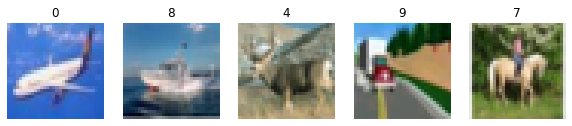

In [49]:
plotsample(data)

In [50]:
#CIFAR100

data100 = torchvision.datasets.CIFAR100(root = "F:\datasets3\cifar"
                                   ,train=True
                                   ,download=False
                                   ,transform = transforms.ToTensor())

In [51]:
data100

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: F:\datasets3\cifar
    Split: Train
    StandardTransform
Transform: ToTensor()

In [52]:
data100.classes

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig

In [53]:
np.unique(data100.targets)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

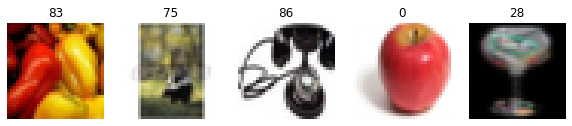

In [54]:
plotsample(data100)

## 二、使用自己的数据集

### 导入自己的数据/图片作为数据集

In [55]:
#训练集
train_dataset = torchvision.datasets.ImageFolder(root="F:\datasets4\picturestotensor\Train",
                                        transform=torchvision.transforms.ToTensor()
                                       )

In [56]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 60
    Root location: F:\datasets4\picturestotensor\Train
    StandardTransform
Transform: ToTensor()

In [57]:
for x,y in train_dataset:
    print(x.shape,y)
    break

torch.Size([3, 687, 409]) 0


In [58]:
train_dataset[0]

(tensor([[[0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
          [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
          [0.9922, 0.9922, 0.9922,  ..., 0.9961, 0.9961, 0.9961],
          ...,
          [0.9922, 0.9922, 0.9922,  ..., 0.9529, 0.9176, 0.9373],
          [0.9922, 0.9922, 0.9922,  ..., 0.9843, 0.9294, 0.9333],
          [0.9922, 0.9922, 0.9922,  ..., 1.0000, 0.9490, 0.9373]],
 
         [[0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
          [0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
          [0.9059, 0.9059, 0.9059,  ..., 0.9569, 0.9569, 0.9569],
          ...,
          [0.8549, 0.8549, 0.8549,  ..., 0.6784, 0.6667, 0.6980],
          [0.8549, 0.8549, 0.8549,  ..., 0.7059, 0.6824, 0.6980],
          [0.8549, 0.8549, 0.8549,  ..., 0.7216, 0.6941, 0.7020]],
 
         [[0.7529, 0.7529, 0.7529,  ..., 0.8588, 0.8588, 0.8588],
          [0.7529, 0.7529, 0.7529,  ..., 0.8588, 0.8588, 0.8588],
          [0.7529, 0.7529, 0.7529,  ...,

In [59]:
train_dataset[58][1]

1

In [60]:
#几种可以调用的属性
train_dataset.classes

['female', 'male']

In [61]:
np.unique(train_dataset.targets)

array([0, 1])

In [62]:
#查看具体的图像地址
train_dataset.imgs

[('F:\\datasets4\\picturestotensor\\Train\\female\\000001.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000002.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000004.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000005.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000006.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000009.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000010.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000011.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000014.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000017.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000018.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000019.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000022.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\female\\000024.jpg', 0),
 ('F:\\datasets4\\picturestotensor\\Train\\femal

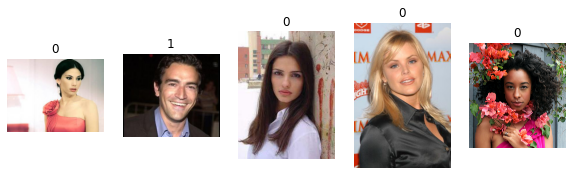

In [63]:
#随机查看5张图像
plotsample(train_dataset)

In [64]:
#测试集 - 注意更换根目录
test_dataset = torchvision.datasets.ImageFolder(root="F:\datasets4\picturestotensor\Test",
                                        transform=torchvision.transforms.ToTensor()
                                       )

In [65]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 62
    Root location: F:\datasets4\picturestotensor\Test
    StandardTransform
Transform: ToTensor()

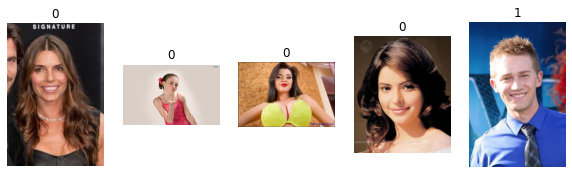

In [66]:
plotsample(test_dataset)

In [67]:
from skimage import io
import pandas as pd
import torch
import os

In [68]:
#读取一张图片

In [69]:
io.imread(r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba\000001.jpg")

array([[[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       ...,

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [243, 173, 122],
        [234, 170, 122],
        [239, 178, 131]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [251, 180, 126],
        [237, 174, 123],
        [238, 178, 128]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [255, 184, 128],
        [242, 177, 123],
        [239, 179, 127]]

In [70]:
#读取我们的标签 - identity个体识别标签

In [71]:
identity = pd.read_csv(r"F:\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt"
                       ,sep = " "
                       ,header = None)

In [72]:
identity.head()

,0,1
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295


In [73]:
identity.iloc[0,0]

'000001.jpg'

In [74]:
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt"

In [75]:
imgdic = os.path.join(imgpath,identity.iloc[0,0])

In [76]:
identity.iloc[0,1]

2880

In [77]:
io.imread(imgdic)

array([[[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       [[253, 231, 192],
        [253, 231, 192],
        [253, 231, 192],
        ...,
        [254, 244, 219],
        [254, 244, 219],
        [254, 244, 219]],

       ...,

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [243, 173, 122],
        [234, 170, 122],
        [239, 178, 131]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [251, 180, 126],
        [237, 174, 123],
        [238, 178, 128]],

       [[253, 218, 176],
        [253, 218, 176],
        [253, 218, 176],
        ...,
        [255, 184, 128],
        [242, 177, 123],
        [239, 179, 127]]

In [78]:
idx = 20

In [79]:
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt"

imgdic = os.path.join(imgpath,identity.iloc[idx,0]) #图像目录
image = io.imread(imgdic) #提取出的，索引为idx的图像的像素值矩阵
label = identity.iloc[idx,1]
sample = (torch.tensor(image),int(label))

In [80]:
sample

(tensor([[[150, 122, 111],
          [149, 121, 110],
          [147, 119, 108],
          ...,
          [125, 150, 170],
          [123, 149, 172],
          [118, 146, 170]],
 
         [[148, 120, 109],
          [147, 119, 108],
          [145, 117, 106],
          ...,
          [114, 137, 155],
          [114, 139, 161],
          [111, 137, 160]],
 
         [[145, 117, 106],
          [145, 117, 106],
          [143, 115, 104],
          ...,
          [ 99, 120, 137],
          [102, 125, 143],
          [100, 125, 145]],
 
         ...,
 
         [[ 32,  25,  41],
          [ 43,  32,  48],
          [ 44,  30,  43],
          ...,
          [ 39,  28,  34],
          [ 42,  31,  35],
          [ 46,  35,  39]],
 
         [[ 31,  24,  40],
          [ 43,  32,  48],
          [ 46,  32,  45],
          ...,
          [ 38,  27,  33],
          [ 40,  29,  33],
          [ 46,  35,  39]],
 
         [[ 26,  19,  35],
          [ 40,  29,  45],
          [ 45,  31,  44],
   

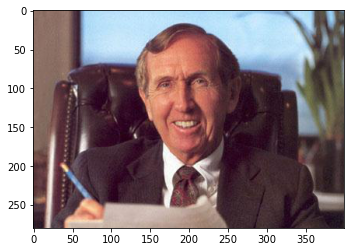

In [81]:
plt.imshow(image)

In [82]:
from torch.utils.data import Dataset
#import numpy as np
#import pandas as pd
#from skimage import io
#import torch, torchvision
#from torchvision import transforms
#import matplotlib.pyplot as plt
#import random

In [83]:
class CustomDataset(Dataset):
    """
    自定义数据集，用于读取celebA数据集中的个体识别（identity recognition）数据的标签和图像
    图像格式为jpg
    """
    def __init__(self,csv_file, root_dir, transform = None):
        """
        参数说明：
            csv_file (字符串): 标签csv/txt的具体地址
            root_dir (string): 所有图片所在的根目录
            transform (callable, optional): 选填，需要对样本进行的预处理
        """
        super().__init__()
        self.identity = pd.read_csv(csv_file,sep=" ",header=None)
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        #展示数据中总共有多少个样本
        return len(self.identity)
    
    def __info__(self):
        print("CustomData")
        print("\t Number of samples: {}".format(len(self.identity)))
        print("\t Number of classes: {}".format(len(np.unique(self.identity.iloc[:,1]))))
        print("\t root_dir: {}".format(self.root_dir))
    
    def __getitem__(self,idx):
        #保证idx不是一个tensor
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        imgdic = os.path.join(self.root_dir,self.identity.iloc[idx,0]) #图像目录
        image = io.imread(imgdic) #提取出的，索引为idx的图像的像素值矩阵
        label = self.identity.iloc[idx,1]
        
        if self.transform != None:
            image = self.transform(image)
            
        sample = (image,label)
        return sample

In [84]:
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\identity_CelebA_1000.txt"

In [85]:
data = CustomDataset(csvpath,imgpath)

In [86]:
data[20]

(array([[[150, 122, 111],
         [149, 121, 110],
         [147, 119, 108],
         ...,
         [125, 150, 170],
         [123, 149, 172],
         [118, 146, 170]],
 
        [[148, 120, 109],
         [147, 119, 108],
         [145, 117, 106],
         ...,
         [114, 137, 155],
         [114, 139, 161],
         [111, 137, 160]],
 
        [[145, 117, 106],
         [145, 117, 106],
         [143, 115, 104],
         ...,
         [ 99, 120, 137],
         [102, 125, 143],
         [100, 125, 145]],
 
        ...,
 
        [[ 32,  25,  41],
         [ 43,  32,  48],
         [ 44,  30,  43],
         ...,
         [ 39,  28,  34],
         [ 42,  31,  35],
         [ 46,  35,  39]],
 
        [[ 31,  24,  40],
         [ 43,  32,  48],
         [ 46,  32,  45],
         ...,
         [ 38,  27,  33],
         [ 40,  29,  33],
         [ 46,  35,  39]],
 
        [[ 26,  19,  35],
         [ 40,  29,  45],
         [ 45,  31,  44],
         ...,
         [ 36,  25,  31],
  

In [87]:
data.__len__()

1000

In [88]:
data.__info__()

CustomData
	 Number of samples: 1000
	 Number of classes: 922
	 root_dir: F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba


In [89]:
for x,y in data:
    print(x.shape)
    print(y)
    break

(687, 409, 3)
2880


#### 读取属性识别的标签

In [90]:
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\list_attr_celeba_1000.txt"

In [91]:
attr_ = pd.read_csv(csvpath,header=None)

In [92]:
attr_.head()

,0
0,202599 5_o_Clock_Shadow Arched_Eyebrows Attrac...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...


In [93]:
len(attr_.iloc[0,0].split()) #默认帮我按空格进行分类，它会把多个空格也当成一个空格

41

In [94]:
attr_ = pd.DataFrame(attr_.iloc[1:,0].str.split().tolist(),
                    columns = attr_.iloc[0,0].split())

In [95]:
attr_.head()

,202599,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [96]:
attr_.loc[:,"Attractive"]

0       1
1      -1
2      -1
3       1
4       1
       ..
995    -1
996     1
997     1
998    -1
999     1
Name: Attractive, Length: 1000, dtype: object

In [97]:
class CustomDataset_attr(Dataset):
    """
    自定义数据集，用于读取celebA数据集中的属性识别（attribute recognition）数据的标签和图像
    图像格式为jpg
    """
    def __init__(self,csv_file, root_dir, labelname, transform = None):
        """
        参数说明：
            csv_file (字符串): 标签csv/txt的具体地址
            root_dir (string): 所有图片所在的根目录
            transform (callable, optional): 选填，需要对样本进行的预处理
        """
        super().__init__()
        self.attr_ = pd.read_csv(csvpath,header=None)
        self.root_dir = root_dir
        self.labelname = labelname
        self.transform = transform
    
    def __len__(self):
        #展示数据中总共有多少个样本
        return len(self.attr_)
    
    def __info__(self):
        print("CustomData")
        print("\t Number of samples: {}".format(len(self.attr_)-1))
        print("\t root_dir: {}".format(self.root_dir))
    
    def __getitem__(self,idx):
        #保证idx不是一个tensor
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        self.attr_ = pd.DataFrame(self.attr_.iloc[1:,0].str.split().tolist(),
                    columns = self.attr_.iloc[0,0].split())
        
        imgdic = os.path.join(self.root_dir,self.attr_.iloc[idx,0]) #图像目录
        image = io.imread(imgdic) #提取出的，索引为idx的图像的像素值矩阵
        label = int(self.attr_.loc[idx,self.labelname])
        
        if self.transform != None:
            image = self.transform(image)
            
        sample = (image,label)
        return sample

In [98]:
imgpath = r"F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba"
csvpath = r"F:\datasets4\picturestotensor\celebAsubset\Anno\list_attr_celeba_1000.txt"
labelname = "Attractive"

data = CustomDataset_attr(csvpath,imgpath,labelname)

data

data.__info__()

data[500]

CustomData
	 Number of samples: 1000
	 root_dir: F:\datasets4\picturestotensor\celebAsubset\Img\Img_celeba.7z\img_celeba


(array([[[ 56,  44,  32],
         [ 56,  44,  32],
         [ 56,  44,  32],
         ...,
         [ 46,  38,  19],
         [ 46,  38,  19],
         [ 46,  38,  19]],
 
        [[ 56,  44,  32],
         [ 56,  44,  32],
         [ 56,  44,  32],
         ...,
         [ 46,  38,  19],
         [ 46,  38,  19],
         [ 46,  38,  19]],
 
        [[ 56,  44,  32],
         [ 56,  44,  32],
         [ 56,  44,  32],
         ...,
         [ 46,  38,  19],
         [ 46,  38,  19],
         [ 46,  38,  19]],
 
        ...,
 
        [[ 54,  52,  37],
         [ 53,  51,  36],
         [ 53,  51,  36],
         ...,
         [196, 210, 211],
         [197, 211, 212],
         [198, 212, 213]],
 
        [[ 56,  54,  39],
         [ 55,  53,  38],
         [ 55,  53,  38],
         ...,
         [197, 211, 212],
         [198, 212, 213],
         [199, 213, 214]],
 
        [[ 57,  55,  40],
         [ 57,  55,  40],
         [ 56,  54,  39],
         ...,
         [199, 213, 214],
  

### 将二维表转化为四维tensor（使用csv/txt创建数据集）

In [ ]:
#import numpy as np
#import torch
#import matplotlib.pyplot as plt

In [99]:
data = np.random.randint(0,255,(10,10000)) #假设现在是10个样本，每个样本10000个特征

In [100]:
data.shape

(10, 10000)

In [102]:
data = data.reshape(10,1,100,100) #可以直接使用reshape的方式将数据调整为4维

In [103]:
data = torch.tensor(data) #再放入tensor中转换格式

In [104]:
data

tensor([[[[202, 208, 107,  ...,  23, 243,  70],
          [ 61,  33, 236,  ...,  46, 193, 163],
          [178,  42, 164,  ...,  66,  31, 193],
          ...,
          [123, 210, 167,  ..., 241,  74, 167],
          [ 18,  94, 116,  ...,  66,  23, 224],
          [ 88,   5,  58,  ..., 140, 203, 206]]],


        [[[202,   4, 187,  ..., 253, 170, 169],
          [233, 131, 189,  ..., 135, 200,  49],
          [205, 216, 237,  ..., 135, 157, 124],
          ...,
          [169,  99, 145,  ..., 189, 194,  28],
          [130,  47, 158,  ...,  94,   0, 132],
          [ 77, 250,  22,  ...,  10,  82, 102]]],


        [[[110,  78, 236,  ..., 203, 174,  48],
          [236, 103, 118,  ...,  77,  55, 214],
          [203, 209,  51,  ..., 225, 194, 181],
          ...,
          [160,   5, 189,  ...,  74, 182,  23],
          [206,  50, 156,  ..., 108, 143,  26],
          [132,  76,  76,  ...,  53,  95,  12]]],


        ...,


        [[[153, 140,  41,  ..., 228, 248,  14],
          [ 59, 

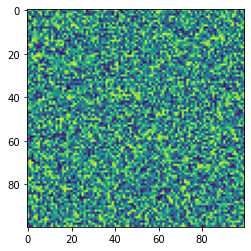

In [105]:
plt.imshow(data.view(-1,100,100,1)[0]);

In [106]:
data

tensor([[[[202, 208, 107,  ...,  23, 243,  70],
          [ 61,  33, 236,  ...,  46, 193, 163],
          [178,  42, 164,  ...,  66,  31, 193],
          ...,
          [123, 210, 167,  ..., 241,  74, 167],
          [ 18,  94, 116,  ...,  66,  23, 224],
          [ 88,   5,  58,  ..., 140, 203, 206]]],


        [[[202,   4, 187,  ..., 253, 170, 169],
          [233, 131, 189,  ..., 135, 200,  49],
          [205, 216, 237,  ..., 135, 157, 124],
          ...,
          [169,  99, 145,  ..., 189, 194,  28],
          [130,  47, 158,  ...,  94,   0, 132],
          [ 77, 250,  22,  ...,  10,  82, 102]]],


        [[[110,  78, 236,  ..., 203, 174,  48],
          [236, 103, 118,  ...,  77,  55, 214],
          [203, 209,  51,  ..., 225, 194, 181],
          ...,
          [160,   5, 189,  ...,  74, 182,  23],
          [206,  50, 156,  ..., 108, 143,  26],
          [132,  76,  76,  ...,  53,  95,  12]]],


        ...,


        [[[153, 140,  41,  ..., 228, 248,  14],
          [ 59, 

In [107]:
from sklearn.preprocessing import PolynomialFeatures as PF
import numpy as np

In [117]:
#如果原始数据是一维的
X = np.arange(1,4).reshape(-1,1)
X

array([[1],
       [2],
       [3]])

In [118]:
#二次多项式，参数degree控制多项式的次方
poly = PF(degree=2) #升维过程当中，你允许我在特征x上设置的最高次方

In [119]:
#接口transform直接调用
X_ = poly.fit_transform(X)

In [120]:
X_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [121]:
X_.shape

(3, 3)

In [122]:
#三次多项式
PF(degree=3).fit_transform(X)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

In [123]:
X = np.arange(6).reshape(3,2)

In [124]:
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [125]:
PF(degree=2).fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [126]:
PF(degree=3).fit_transform(X)

array([[  1.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [137]:
#在加利福尼亚房价数据集上做实验
#这是基于sklearn框架的代码，与传统深度学习代码有较大区别
from sklearn.datasets import fetch_california_housing as FCH
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LinearRegression as LR #线性回归
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE

In [138]:
data = FCH() #实例化

In [139]:
X = data.data
y = data.target

In [140]:
y #0~5之间的小数

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [142]:
X.shape #原始数据只有8个特征，特征量非常少

(20640, 8)

In [143]:
y.shape

(20640,)

In [144]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [145]:
reg = LR().fit(Xtrain,Ytrain)

In [146]:
MSE(reg.predict(Xtrain),Ytrain)

0.5218522662533102

In [147]:
MSE(reg.predict(Xtest),Ytest)
#训练集和测试集结果非常相近，虽然表现不佳但是不存在太多过拟合的情况

0.5309012639324552

In [148]:
poly = PF(degree=4).fit(Xtrain)

In [149]:
Xtrain_ = poly.transform(Xtrain)
Xtest_ = poly.transform(Xtest)

In [150]:
Xtrain_.shape

(14448, 495)

In [151]:
Xtest_.shape

(6192, 495)

In [152]:
reg = LR().fit(Xtrain_,Ytrain)

In [153]:
MSE(reg.predict(Xtrain_),Ytrain)

0.30466250104931375

In [154]:
MSE(reg.predict(Xtest_),Ytest) #测试集上的MSE变得巨大无比，这是严重过拟合的情况

254805.20944757768

In [155]:
from sklearn.datasets import fetch_covtype as FC
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LogisticRegression as LR #逻辑回归
from sklearn.model_selection import train_test_split as TTS

In [156]:
data = FC() #首次加载会比较耗时，需要进行数据下载

In [157]:
data.data.shape #数据量巨大，因此我们从中抽样2000个样本来进行训练

(581012, 54)

In [158]:
data.target

array([5, 5, 2, ..., 3, 3, 3])

In [159]:
X = data.data[:2000]

In [160]:
X.shape

(2000, 54)

In [180]:
np.unique(y)

array([1, 2, 3, 4, 5, 6, 7])

In [161]:
y = data.target[:2000]

In [162]:
Xtrain,Xtest,Ytrain,Ytest = TTS(X,y,test_size=0.3,random_state=420)

In [163]:
#======【TIME WARNING：1mins】=======#
clf = LR(random_state=420, max_iter=1000,solver="newton-cg").fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [164]:
clf.score(Xtrain,Ytrain) #对分类模型而言，该接口是分类准确率

0.7528571428571429

In [165]:
clf.score(Xtest,Ytest)

0.7116666666666667

In [166]:
poly = PF(degree=2,interaction_only=True).fit(Xtrain) #不包含各特征的平方项

In [167]:
Xtrain_ = poly.transform(Xtrain)
Xtest_ = poly.transform(Xtest)

In [169]:
Xtrain_.shape

(1400, 1486)

In [172]:
np.sqrt(1486) -> 38x38,39x39

38.54867053479276

In [174]:
1486/39

38.1025641025641

In [168]:
#======【TIME WARNING：10mins】======#
clf_ = LR(random_state=420, max_iter=1000,solver="newton-cg").fit(Xtrain_,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [170]:
clf_.score(Xtrain_,Ytrain)

0.8321428571428572

In [171]:
clf_.score(Xtest_,Ytest)
#准确率表现整体上升，存在过拟合但没有太夸张，数据适合放入卷积网络

0.7683333333333333

In [175]:
38*38

1444

In [178]:
clf_.coef_.shape

(7, 1486)

In [185]:
weights = pd.DataFrame(abs(clf_.coef_).mean(axis=0))

In [190]:
idx = weights.sort_values(by=0,ascending=False).iloc[:1444,0].index

In [191]:
X_ = poly.transform(X)

In [192]:
X_ = X_[:,idx]

In [193]:
X_.shape

(2000, 1444)

In [195]:
X_ = X_.reshape(2000,1,38,38)

In [196]:
X_

array([[[[4.440000e+02, 6.630000e+02, 0.000000e+00, ..., 0.000000e+00,
          0.000000e+00, 1.183200e+04],
         [5.100000e+02, 5.701800e+04, 1.456728e+06, ..., 0.000000e+00,
          1.883700e+04, 1.530000e+03],
         [6.279000e+03, 0.000000e+00, 6.960000e+02, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         ...,
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00],
         [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
          0.000000e+00, 0.000000e+00]]],


       [[[3.020000e+02, 4.400000e+02, 0.000000e+00, ..., 0.000000e+00,
          0.000000e+00, 1.316000e+04],
         [3.900000e+02, 4.664000e+04, 1.462875e+06, ..., 0.000000e+00,
          1.245000e+04, 7.800000e+02],
         [6.225000e+03, 0.000000e+00, 4.700000e+02, ..., 0.000000e+00,
          0.000000e+00, 0.00000

In [ ]:
#如何将我们的特征高维矩阵与我们的标签结合起来

In [197]:
from torch.utils.data import TensorDataset

In [198]:
y.shape

(2000,)

In [199]:
data = TensorDataset(torch.tensor(X_),torch.tensor(y))

In [201]:
for x,y in data:
    print(x.shape)
    print(y)
    break

torch.Size([1, 38, 38])
tensor(5, dtype=torch.int32)


In [202]:
data[0]

(tensor([[[4.4400e+02, 6.6300e+02, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 1.1832e+04],
          [5.1000e+02, 5.7018e+04, 1.4567e+06,  ..., 0.0000e+00,
           1.8837e+04, 1.5300e+03],
          [6.2790e+03, 0.0000e+00, 6.9600e+02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00]]], dtype=torch.float64),
 tensor(5, dtype=torch.int32))

In [ ]:
#FashionMNIST数据集就是pt格式的数据，可以直接使用torch.load进行读取
#import torch

X, y = torch.load(r"F:\datasets\FashionMNIST\processed\test.pt")
X.shape
y

In [ ]:
#mat格式，SVHN就是mat格式数据集，我们使用scipy中的sio模块进行读取
#通常来说，scipy属于anaconda自带库，无需额外安装。如果你需要安装scipy，搜索pip安装scipy即可
import scipy.io as sio
#import numpy as np
#import torch

In [ ]:
loaded_mat = sio.loadmat(r'F:\datasets\SVHN\train_32x32.mat')

In [ ]:
X = torch.tensor(loaded_mat['X'])
y = loaded_mat['y'].astype(np.int64).squeeze()

In [ ]:
#格式与pytorch要求的不符，记得调整
X.shape

In [ ]:
X = X.reshape(-1,3,32,32) #(sample, channels, weight, height)

In [ ]:
#本段代码已超出深度学习范围，仅供使用，不做讲解。
#如果你希望，可以将其保存在torchlearning.py文件中方便导入

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import six
import string
import pickle
import bisect
import lmdb
from PIL import Image

import torch
from torch.utils.data import DataLoader, Dataset, IterableDataset
from torchvision.transforms import transforms
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets

class ImageFolderLMDB(Dataset):
    """
    用于从单一lmdb文件中提取出数据集的类
    只适用于lmdb文件中只包含一个标签类别的情况
    不同的标签类别需要使用不同的ImageFolderLMDB进行提取
    """
    def __init__(self, db_path, classes: int, transform=None, target_transform=None):
        """
        参数说明
        db_path: 字符串，需要读取的lmdb文件所在的根目录
        classes: int，给现有数据集打上的单一标签。注意该标签是人工标注的，不一定是数据中心的客观标签
        """
        super().__init__()
        self.db_path = db_path
        self.classes = classes
        self.transform = transform
        self.target_transform = target_transform

        #首先使用lmdb库从lmdb文件中提出数据集
        self.env = lmdb.open(db_path, max_readers=1, readonly=True, lock=False,
                             readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.length = txn.stat()['entries']
        cache_file = '_cache_' + ''.join(c for c in db_path if c in string.ascii_letters)
        if os.path.isfile(cache_file):
            self.keys = pickle.load(open(cache_file, "rb"))
        else:
            with self.env.begin(write=False) as txn:
                self.keys = [key for key in txn.cursor().iternext(keys=True, values=False)]
            pickle.dump(self.keys, open(cache_file, "wb"))
	
    def __getitem__(self, index):
        img, target = None, None
        env = self.env
        with env.begin(write=False) as txn:
            imgbuf = txn.get(self.keys[index])

        # 导入图像
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')

        # 导入标签
        target = self.classes

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target

    def __len__(self):
        return self.length

    def __repr__(self):
        return self.__class__.__name__ + ' (' + self.db_path + ')'

In [ ]:
from torch.utils.data import ConcatDataset

#先使用ImageFolderLMDB单独读取数据中的两个类别
data_church = ImageFolderLMDB(r"F:\datasets2\lsun-master\data\church_outdoor_train_lmdb",classes=0
                      ,transform=transforms.ToTensor())

In [ ]:
data_church[0][0].shape

In [ ]:
for x,y in data_church:
    print(x.shape)
    print(y)
    break

In [ ]:
data_classroom = ImageFolderLMDB(r"F:\datasets2\lsun-master\data\classroom_train_lmdb",classes=1
                      ,transform=transforms.ToTensor())

In [ ]:
data_classroom[0][0].shape

In [ ]:
#使用ConcatDataset将其合并
data = ConcatDataset([data_church,data_classroom])

In [ ]:
#数据尺寸已经超出了可以做循环的程度
data.__len__()

In [ ]:
data_church.__len__()

In [ ]:
data_classroom.__len__()

In [ ]:
data[120000]

In [ ]:
data[160000]